### 1. Import Necessary Libraries


In [2]:
# Import Lib
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Setting a consistent style for plots
sns.set_style("whitegrid")

### 2. Load the Dataset

In [4]:
# Load dataset and inspect its structure
dataset_path = "inputdata-5.csv"
data = pd.read_csv(dataset_path)

# Display dataset overview
print("Dataset Information:")
print(data.info())
print("\nFirst Few Rows of the Dataset:")
print(data.head())
print("\nSummary Statistics:")
print(data.describe())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   OnlineAdvertising  121 non-null    float64
 1   TVAdvertising      121 non-null    float64
 2   Revenue            121 non-null    float64
dtypes: float64(3)
memory usage: 3.0 KB
None

First Few Rows of the Dataset:
   OnlineAdvertising  TVAdvertising  Revenue
0           0.523256        9.45141  40.3415
1           0.539447        8.94502  35.6905
2           0.325468        8.01125  53.4347
3           0.514834        7.71204  44.2337
4           0.175287        5.91093  38.3476

Summary Statistics:
       OnlineAdvertising  TVAdvertising     Revenue
count         121.000000     121.000000  121.000000
mean            5.149902       5.101912   67.841307
std             3.159706       3.229884   23.884395
min             0.040730       0.030223   17.575000
25%    

### 3. Exploratory Data Analysis (EDA)

In [5]:
# Check for missing values
print("\nChecking for Missing Values:")
print(data.isnull().sum())


Checking for Missing Values:
OnlineAdvertising    0
TVAdvertising        0
Revenue              0
dtype: int64


<Figure size 1200x600 with 0 Axes>

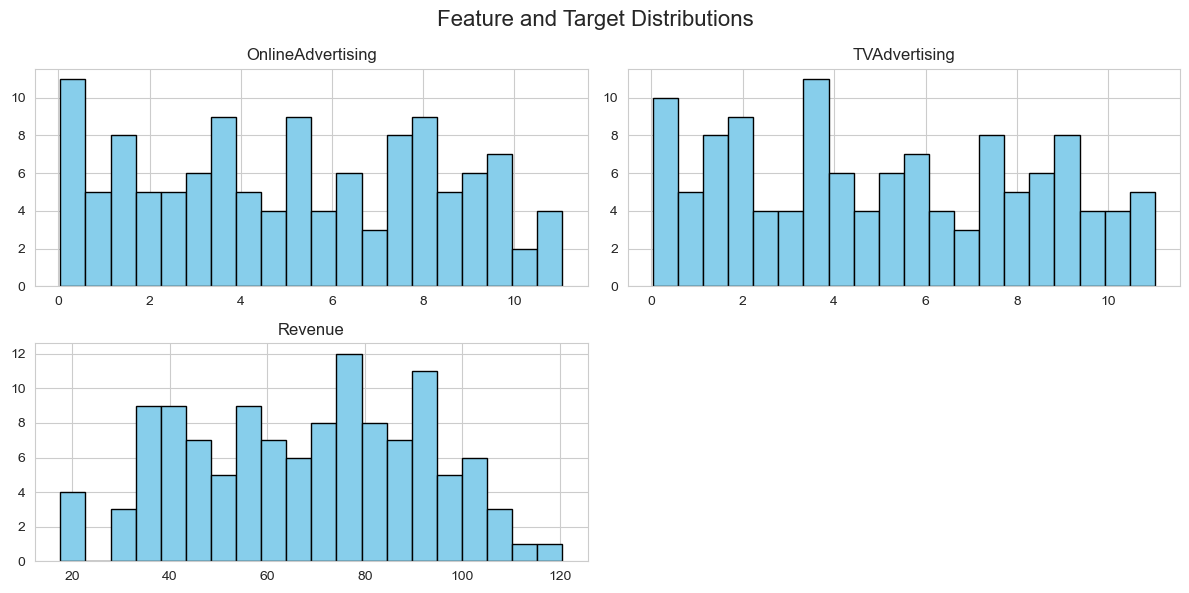

In [6]:
# Visualize distributions of features and target
plt.figure(figsize=(12, 6))
data.hist(bins=20, figsize=(12, 6), edgecolor="black", color="skyblue")
plt.suptitle("Feature and Target Distributions", fontsize=16)
plt.tight_layout()
plt.show()

F:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


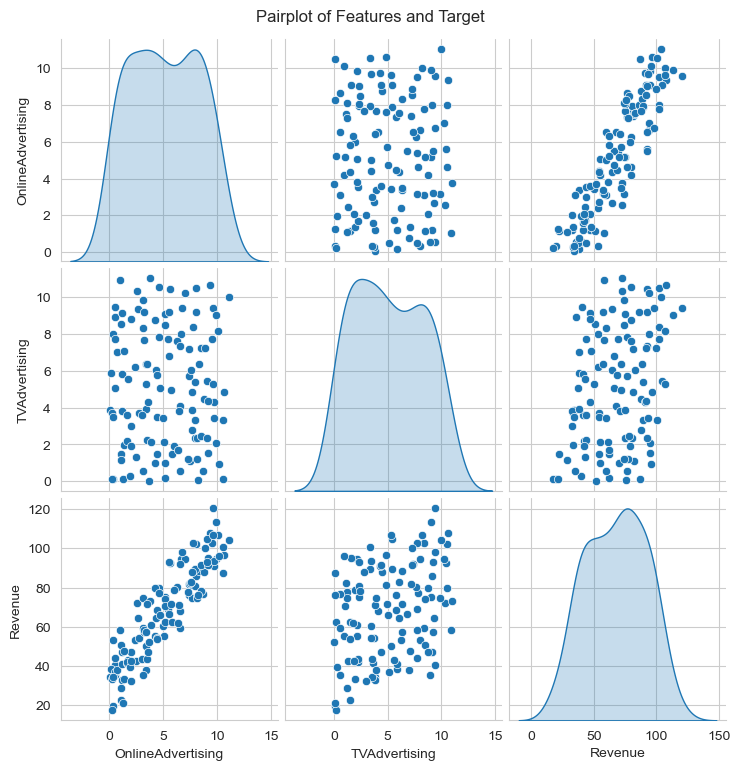

In [7]:
# Pairplot for relationships between features and target
sns.pairplot(data, diag_kind="kde")
plt.suptitle("Pairplot of Features and Target", y=1.02)
plt.show()

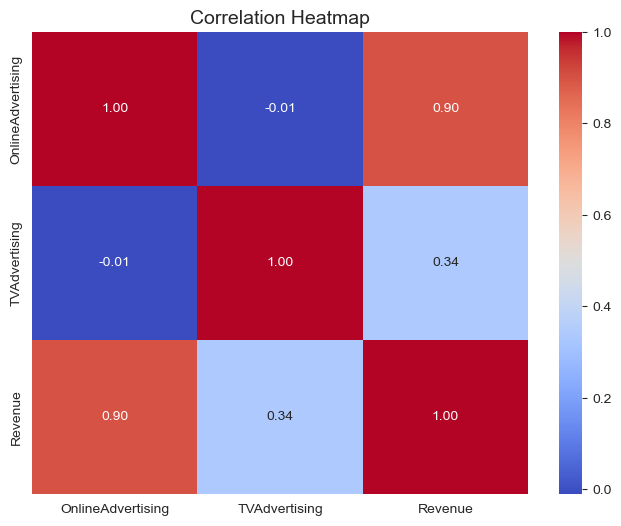

In [8]:
# Correlation matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap", fontsize=14)
plt.show()

### 4. Data Cleaning and Feature Engineering


In [9]:
# Check for duplicates
print("\nChecking for Duplicate Rows:")
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
if duplicates > 0:
    data = data.drop_duplicates()


Checking for Duplicate Rows:
Number of duplicate rows: 0


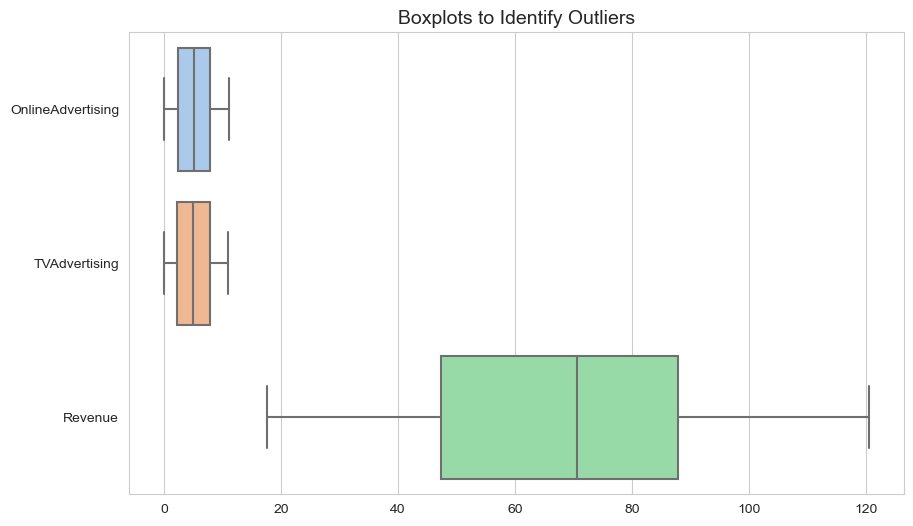

In [10]:
# Checking for outliers using boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, orient="h", palette="pastel")
plt.title("Boxplots to Identify Outliers", fontsize=14)
plt.show()

### 5. Define Features and Target

In [11]:
# Extracting features (X) and target (y)
X = data[["OnlineAdvertising", "TVAdvertising"]]
y = data["Revenue"]


In [12]:
# ## 6. Split Dataset into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [13]:
print(f"\nTraining Set Size: {X_train.shape}")
print(f"Testing Set Size: {X_test.shape}")


Training Set Size: (96, 2)
Testing Set Size: (25, 2)


### 7. Train Gradient Boosting Regressor

In [14]:
# Define the model and hyperparameter grid
param_grid = {
    "n_estimators": [50, 100, 200],
    "learning_rate": [0.01, 0.1, 0.2],
    "max_depth": [3, 5, 7],
    "min_samples_split": [2, 5, 10],
}

# Initialize Gradient Boosting Regressor
gbr = GradientBoostingRegressor(random_state=42)

# Perform GridSearchCV
print("\nPerforming Grid Search for Hyperparameter Optimization...")
grid_search = GridSearchCV(
    gbr, param_grid, cv=5, scoring="neg_mean_squared_error", n_jobs=-1, verbose=1
)
grid_search.fit(X_train, y_train)


Performing Grid Search for Hyperparameter Optimization...
Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error', verbose=1)

In [15]:
# Display best hyperparameters
best_params = grid_search.best_params_
print("\nBest Hyperparameters:")
print(best_params)

# Train the optimized model
best_model = grid_search.best_estimator_



Best Hyperparameters:
{'learning_rate': 0.1, 'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 50}


### 8. Evaluate Model Performance

In [16]:
# Predictions on test set
y_pred = best_model.predict(X_test)

# Calculate RMSE and R²
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

In [17]:
print("\nModel Evaluation Metrics:")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")


Model Evaluation Metrics:
Root Mean Squared Error (RMSE): 6.34
R-squared (R²): 0.92


### 9. Visualizations

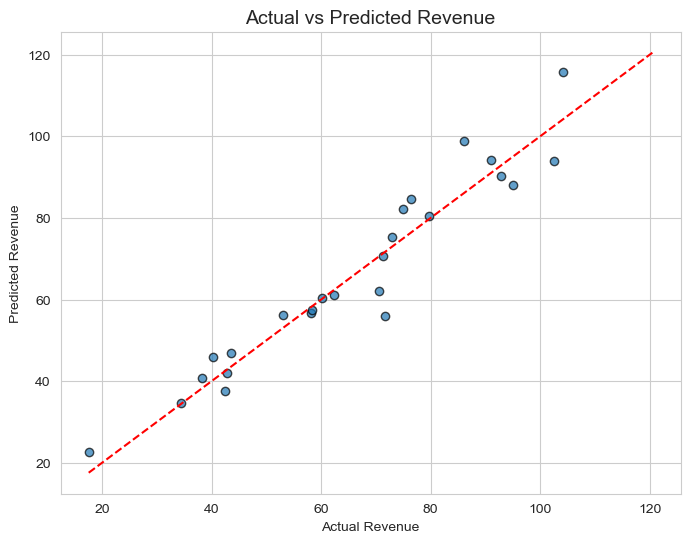

In [18]:
# Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, edgecolor="k")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color="red", linestyle="--")
plt.title("Actual vs Predicted Revenue", fontsize=14)
plt.xlabel("Actual Revenue")
plt.ylabel("Predicted Revenue")
plt.show()

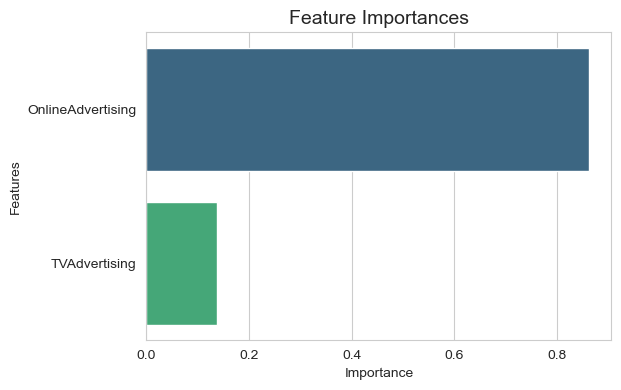

In [19]:
# Feature Importance
feature_importances = best_model.feature_importances_
plt.figure(figsize=(6, 4))
sns.barplot(x=feature_importances, y=X.columns, palette="viridis")
plt.title("Feature Importances", fontsize=14)
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()